# Exercises

This notebook presents solutions to exercises 2.16 through 2.47 from *Operations Research: A Practical Approach*. These exercises cover various topics in linear programming, including the Simplex method, sensitivity analysis, duality, and special cases such as degeneracy, unbounded solutions, and multiple optima. The solutions are implemented using Python, leveraging optimization tools like `scipy.optimize.linprog` to systematically solve and analyze each problem.

# **Simplex Method Definition**

## What is the Simplex Method?
The **Simplex Method** is an algorithm used for solving **linear programming problems (LPPs)**. It is widely applied in optimization to maximize or minimize a **linear objective function** subject to **linear constraints**. The method efficiently navigates through the feasible region of solutions to find the optimal one.

## Why Use the Simplex Method?
- It provides an efficient way to solve real-world optimization problems in **engineering, economics, logistics, and manufacturing**.
- It can handle multiple constraints and variables, making it more powerful than graphical methods.
- It guarantees an **optimal solution** if one exists.

## Standard Form of a Linear Programming Problem
To apply the **Simplex Method**, a linear programming problem must be in standard form:
1. The objective function must be **maximized** (if minimizing, we convert it to maximization by multiplying by -1).
2. All constraints must be **equalities** (convert inequalities using slack, surplus, or artificial variables).
3. All decision variables must be **non-negative** (for unrestricted variables, we split them into two non-negative variables).

### General Form:
**Maximize**
$$z = c_1x_1 + c_2x_2 + ... + c_nx_n$$
**Subject to:**
$$a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n \leq b_1$$
$$a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n \geq b_2$$
$$a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n = b_m$$
$$ x_1, x_2, ..., x_n \geq 0$$


## Libraries and Tools for Google Colab
To run the code smoothly in Google Colab, install **SciPy's** which is a widely used Python library for scientific computing.It provides a variety of modules for tasks like linear algebra, optimization, integration, interpolation, and more. The `linprog()` function from this library is used to solve linear programming problems using the Simplex method.

```python
!pip install scipy

```

Below is a sample Python implementation:
### Example Code (Exercise 2.12)
```python
from scipy.optimize import linprog

# Objective Function Coefficients (Convert maximization to minimization by negating)
c = [-16, -2, 3]  # Coefficients of x1, x2, x3

# Coefficients of the Left-Hand Side of Constraints
A = [[-1, 6, 0],    # x1 - 6x2 ≥ 4 -> -x1 + 6x2 ≤ -4
     [3, 7, -1],    # 3x2 + 7x3 ≤ -5
     [1, 1, 1]]     # x1 + x2 + x3 = 10

# Right-Hand Side of Constraints
b = [-4, -5, 10]  

# Variable Bounds (x1, x2, x3 ≥ 0)
x_bounds = [(0, None), (0, None), (0, None)]

# Solve the Linear Program
result = linprog(c, A_ub=A[:2], b_ub=b[:2], A_eq=[A[2]], b_eq=[b[2]], bounds=x_bounds, method='highs')

# Print Results
if result.success:
    print("Optimal Solution:")
    print(f"x1 = {result.x[0]:.2f}")
    print(f"x2 = {result.x[1]:.2f}")
    print(f"x3 = {result.x[2]:.2f}")
    print(f"Optimal Objective Value (Maximized Z): {-result.fun:.2f}")
else:
    print("No feasible solution found.")


# **Exercises Walkthrough**

## **Exercise 2.16: Simplex Method**

An academic computing center receives a large number of jobs from students
and faculty to be executed on the computing facilities. **Each student job requires six units of space on disk, and three units of time on a printer**. **Each faculty job requires eight units of space on disk, and two units of time on a printer.** A mixture of jobs is to be selected and run as a batch, and the **total disk space and printer time available for a batch are 48 units and 60 units, respectively.** The computer center is paid **three times as much for running a student job as for running a faculty job.**

Formulate a linear programming problem to determine the mixture of jobs to be
run as a batch that will maximize computer center income.

Use Simplex Method.

**Solution:**

### **Decision Variables**
- \( $x_1$ \): Number of student jobs
- \( $x_2$ \): Number of faculty jobs

### **Objective Function (Maximize Revenue)**
\[
$\max (z = 3x_1 + x_2)$
\]

### **Constraints**

$$6x_1 + 8x_2 \leq 48 \quad \text{(Disk space)}$$


$$3x_1 + 2x_2 \leq 60 \quad \text{(Printer time)}$$


$$x_1, x_2 \geq 0$$

### Code Implementation

In [1]:
!apt-get install -y coinor-cbc
!pip install pyomo
!pip install scipy

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [2]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize income)
c = [-3, -1]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [6, 8],  # Disk space constraint
    [3, 2]   # Printer time constraint
]

# Right-hand side of the inequality constraints
b = [48, 60]

# Bounds for the decision variables (number of student and faculty jobs)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal number of student and faculty jobs
num_student_jobs = res.x[0]
num_faculty_jobs = res.x[1]

# Calculate the percentage utilization of disk and printer resources
disk_utilization = (6 * num_student_jobs + 8 * num_faculty_jobs) / 48 * 100
printer_utilization = (3 * num_student_jobs + 2 * num_faculty_jobs) / 60 * 100

# Print the results
print(f"Optimal number of student jobs: {num_student_jobs}")
print(f"Optimal number of faculty jobs: {num_faculty_jobs}")
print(f"Percentage utilization of disk resources: {disk_utilization}%")
print(f"Percentage utilization of printer resources: {printer_utilization}%")

Optimal number of student jobs: 8.0
Optimal number of faculty jobs: 0.0
Percentage utilization of disk resources: 100.0%
Percentage utilization of printer resources: 40.0%


## **Exercise 2.17: Simplex Method**

### **Objective Function**
\[
$\max (z = x_1 + 2x_2)$
\]

### **Constraints**

$$x_1 + x_2 \geq 6 $$


$$x_2 \leq 6$$

$$x_1 \leq 8$$

$$x_1, x_2 \geq 0$$

### Code Implementation

In [3]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize Z = X1 + 2X2)
c = [-1, -2]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [-1, -1],  # x1 + x2 >= 6 -> -x1 - x2 <= -6
    [0, 1],    # x2 <= 6
    [1, 0]     # x1 <= 8
]

# Right-hand side of the inequality constraints
b = [-6, 6, 8]

# Bounds for the decision variables (X1 and X2)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal values of X1 and X2
X1 = res.x[0]
X2 = res.x[1]

# Optimal value of Z
Z = X1 + 2 * X2

# Print the results
print(f"Optimal value of X1: {X1}")
print(f"Optimal value of X2: {X2}")
print(f"Optimal value of Z: {Z}")

Optimal value of X1: 8.0
Optimal value of X2: 6.0
Optimal value of Z: 20.0


## **Exercise 2.18: Simplex Method**

### **Objective Function**
\[
$\max (z = 4x_1 + 1x_2)$
\]

### **Constraints**

$$3x_1 + x_2 = 3 $$

$$4x_1 + 3x_2 \geq 6 $$

$$x_1 + 2x_2 \leq 3 $$

$$x_1, x_2 \geq 0$$

### Code Implementation

In [4]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize z = 4x1 + x2)
c = [-4, -1]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [-4, -3],  # 4x1 + 3x2 >= 6 -> -4x1 - 3x2 <= -6
    [1, 2]     # x1 + 2x2 <= 3
]

# Right-hand side of the inequality constraints
b = [-6, 3]

# Coefficients of the equality constraint
A_eq = [
    [3, 1]     # 3x1 + x2 = 3
]

# Right-hand side of the equality constraint
b_eq = [3]

# Bounds for the decision variables (X1 and X2)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds], method='highs')

# Optimal values of X1 and X2
X1 = res.x[0]
X2 = res.x[1]

# Optimal value of Z
Z = 4 * X1 + X2

# Print the results
print(f"Optimal value of X1: {X1}")
print(f"Optimal value of X2: {X2}")
print(f"Optimal value of Z: {Z}")

Optimal value of X1: 0.6
Optimal value of X2: 1.2
Optimal value of Z: 3.5999999999999996


## **Exercise 2.19: Simplex Method**

#### Problems:
1. **Problem (a):**
   - **Objective:** Maximize $$3x_1 + x_2$$
   - **Constraints:**
$$x_1 \leq 8$$
$$2x_1 - 3x_2 \leq 5$$
$$x_1, x_2 \geq 0$$

2. **Problem (b):**
   - **Objective:** Maximize $$3x_1 + 4x_2$$
   - **Constraints:**
$$x_1 + x_2 \geq 5$$
$$2x_1 + 1x_2 \leq 4$$
$$x_1, x_2 \geq 0$$

3. **Problem (c):**
   - **Objective:** Maximize $$x_1 + 2x_2$$
   - **Constraints:**
$$x_1 + 2x_2 \leq 10$$
$$x_1, x_2 \geq 0$$

4. **Problem (d):**
   - **Objective:** Maximize $$3x_1 + 9x_2$$
   - **Constraints:**
$$x_1 + 4x_2 \leq 8$$
$$x_1 + 2x_2 \leq 8$$
$$x_1, x_2 \geq 0$$

### Code Implementation

In [5]:
from scipy.optimize import linprog

# Define a function to solve the linear programming problem
def solve_lp(c, A, b, A_eq=None, b_eq=None):
    # Bounds for the decision variables (X1 and X2)
    x0_bounds = (0, None)
    x1_bounds = (0, None)

    # Solve the linear programming problem using the Highs solver
    res = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds], method='highs')

    # Check if the solution is valid
    if res.success:
        # Optimal values of X1 and X2
        X1 = res.x[0]
        X2 = res.x[1]

        # Optimal value of Z
        Z = -res.fun  # Negate because we minimized the negative of the objective function

        return X1, X2, Z
    else:
        return None, None, None

# Problem (a)
c_a = [-3, -1]
A_a = [[1, 0], [2, -3]]
b_a = [8, 5]
X1_a, X2_a, Z_a = solve_lp(c_a, A_a, b_a)

# Problem (b)
c_b = [-3, -4]
A_b = [[-1, -1], [2, 1]]
b_b = [-5, 4]
X1_b, X2_b, Z_b = solve_lp(c_b, A_b, b_b)

# Problem (c)
c_c = [-1, -2]
A_c = [[1, 2]]
b_c = [10]
X1_c, X2_c, Z_c = solve_lp(c_c, A_c, b_c)

# Problem (d)
c_d = [-3, -9]
A_d = [[1, 4], [1, 2]]
b_d = [8, 8]
X1_d, X2_d, Z_d = solve_lp(c_d, A_d, b_d)

# Print the results for all problems
if X1_a is None:
    print("Problem (a): No feasible solution")
else:
    print(f"Problem (a): Optimal value of X1: {X1_a}, Optimal value of X2: {X2_a}, Optimal value of Z: {Z_a}")

if X1_b is None:
    print("Problem (b): No feasible solution")
else:
    print(f"Problem (b): Optimal value of X1: {X1_b}, Optimal value of X2: {X2_b}, Optimal value of Z: {Z_b}")

if X1_c is None:
    print("Problem (c): No feasible solution")
else:
    print(f"Problem (c): Optimal value of X1: {X1_c}, Optimal value of X2: {X2_c}, Optimal value of Z: {Z_c}")

if X1_d is None:
    print("Problem (d): No feasible solution")
else:
    print(f"Problem (d): Optimal value of X1: {X1_d}, Optimal value of X2: {X2_d}, Optimal value of Z: {Z_d}")

Problem (a): No feasible solution
Problem (b): No feasible solution
Problem (c): Optimal value of X1: 10.0, Optimal value of X2: 0.0, Optimal value of Z: 10.0
Problem (d): Optimal value of X1: 8.0, Optimal value of X2: 0.0, Optimal value of Z: 24.0


## **Exercise 2.20: No Evidence of Unboundedness**

This exercise involves creating a linear programming problem formulation that has unbounded solutions but in which no evidence of unboundedness appears in the initial Simplex tableau.

### Problem:
- **Objective:** Maximize $$z = 3x_1 + 2x_2$$
- **Constraints:**
$$x_1 - x_2 \leq 4 $$
$$-x_1 + 2x_2 \leq 6 $$
$$x_1, x_2 \geq 0 $$

### Explanation:
In this problem, the constraints do not provide a bound on the variable \( $x_2$ \) in the positive direction. As a result, \( $x_2$ \) can increase indefinitely, leading to an unbounded solution. However, this unboundedness is not immediately apparent from the initial Simplex tableau.

### Code Implementation

In [6]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize z = 3x1 + 2x2)
c = [-3, -2]  # Negative because linprog does minimization

# Coefficients of the inequality constraints
A = [
    [1, -1],  # x1 - x2 <= 4
    [-1, 2]   # -x1 + 2x2 <= 6
]

# Right-hand side of the inequality constraints
b = [4, 6]

# Bounds for the decision variables (X1 and X2)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve the linear programming problem using the Highs solver
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Check if the solution is valid
if res.status == 3:  # Status 3 indicates unbounded solution
    print("The solution is unbounded")
else:
    print("The solution is not unbounded")

The solution is not unbounded


## **Exercise 2.21: Many Simplex Iterations**

#### Problems:
1. **Problem (a):**
   - **Objective:** Maximize $$3x_1 + x_2$$
   - **Constraints:**
$$x_1 \leq 8$$
$$2x_1 - 3x_2 \leq 5$$
$$x_1, x_2 \geq 0$$

2. **Problem (b):**
   - **Objective:** Maximize $$3x_1 + 4x_2$$
   - **Constraints:**
$$x_1 + x_2 \geq 5$$
$$2x_1 + 1x_2 \leq 4$$
$$x_1, x_2 \geq 0$$

3. **Problem (c):**
   - **Objective:** Maximize $$x_1 + 2x_2$$
   - **Constraints:**
$$x_1 + 2x_2 \leq 10$$
$$x_1, x_2 \geq 0$$

4. **Problem (d):**
   - **Objective:** Maximize $$3x_1 + 9x_2$$
   - **Constraints:**
$$x_1 + 4x_2 \leq 8$$
$$x_1 + 2x_2 \leq 8$$
$$x_1, x_2 \geq 0$$

### Code Implementation

In [7]:
from scipy.optimize import linprog

# Define a function to solve the linear programming problem
def solve_lp(c, A, b, A_eq=None, b_eq=None):
    # Bounds for the decision variables (X1 and X2)
    x0_bounds = (0, None)
    x1_bounds = (0, None)

    # Solve the linear programming problem using the Highs solver
    res = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds], method='highs')

    # Check if the solution is valid
    if res.success:
        # Optimal values of X1 and X2
        X1 = res.x[0]
        X2 = res.x[1]

        # Optimal value of Z
        Z = -res.fun  # Negate because we minimized the negative of the objective function

        return X1, X2, Z
    else:
        return None, None, None

# Problem (a)
c_a = [-3, -1]
A_a = [[1, 0], [2, -3]]
b_a = [8, 5]
X1_a, X2_a, Z_a = solve_lp(c_a, A_a, b_a)

# Problem (b)
c_b = [-3, -4]
A_b = [[-1, -1], [2, 1]]
b_b = [-5, 4]
X1_b, X2_b, Z_b = solve_lp(c_b, A_b, b_b)

# Problem (c)
c_c = [-1, -2]
A_c = [[1, 2]]
b_c = [10]
X1_c, X2_c, Z_c = solve_lp(c_c, A_c, b_c)

# Problem (d)
c_d = [-3, -9]
A_d = [[1, 4], [1, 2]]
b_d = [8, 8]
X1_d, X2_d, Z_d = solve_lp(c_d, A_d, b_d)

# Print the results for all problems
if X1_a is None:
    print("Problem (a): No feasible solution")
else:
    print(f"Problem (a): Optimal value of X1: {X1_a}, Optimal value of X2: {X2_a}, Optimal value of Z: {Z_a}")

if X1_b is None:
    print("Problem (b): No feasible solution")
else:
    print(f"Problem (b): Optimal value of X1: {X1_b}, Optimal value of X2: {X2_b}, Optimal value of Z: {Z_b}")

if X1_c is None:
    print("Problem (c): No feasible solution")
else:
    print(f"Problem (c): Optimal value of X1: {X1_c}, Optimal value of X2: {X2_c}, Optimal value of Z: {Z_c}")

if X1_d is None:
    print("Problem (d): No feasible solution")
else:
    print(f"Problem (d): Optimal value of X1: {X1_d}, Optimal value of X2: {X2_d}, Optimal value of Z: {Z_d}")

Problem (a): No feasible solution
Problem (b): No feasible solution
Problem (c): Optimal value of X1: 10.0, Optimal value of X2: 0.0, Optimal value of Z: 10.0
Problem (d): Optimal value of X1: 8.0, Optimal value of X2: 0.0, Optimal value of Z: 24.0


## **Exercise 2.22: Two-Phase Simplex Method**

This exercise involves solving a linear programming problem using the Two-Phase Simplex method.

### Problem:
- **Objective:** Maximize $$z = 4x_1 + x_2$$
- **Constraints:**
$$3x_1 + x_2 = 3$$
$$4x_1 + 3x_2 \geq 6$$
$$x_1 + 2x_2 \leq 3$$
$$x_1, x_2 \geq 0$$



### Code Implementation

In [8]:
import numpy as np
from scipy.optimize import linprog

# Phase 1: Minimize w = a1 (remove artificial variable)
c_phase1 = [0, 0, 0, 0, 1]  # Objective function for phase 1 (w = a1)
A_eq_phase1 = [
    [3, 1, 0, 0, 0],  # 3x1 + x2 = 3
    [4, 3, -1, 0, 1],  # 4x1 + 3x2 - s1 + a1 = 6
    [1, 2, 0, 1, 0]    # x1 + 2x2 + s2 = 3
]
b_eq_phase1 = [3, 6, 3]

# Solve Phase 1
res_phase1 = linprog(c=c_phase1, A_eq=A_eq_phase1, b_eq=b_eq_phase1, method='highs')
if res_phase1.success and np.isclose(res_phase1.fun, 0):
    print("Phase 1 successful: Feasible solution found.")
else:
    print("Phase 1 failed: No feasible solution.")
    exit()

# Phase 2: Maximize original objective function z = 4x1 + x2
c_phase2 = [-4, -1, 0, 0, 0]  # Maximize z (convert to minimization problem)
A_eq_phase2 = A_eq_phase1
b_eq_phase2 = b_eq_phase1

# Solve Phase 2
res_phase2 = linprog(c=c_phase2, A_eq=A_eq_phase2, b_eq=b_eq_phase2, method='highs')
if res_phase2.success:
    print("Optimal solution found:")
    print(f"x1 = {res_phase2.x[0]:.2f}, x2 = {res_phase2.x[1]:.2f}")
    print(f"Maximum z = {-res_phase2.fun:.2f}")
else:
    print("Optimization failed in Phase 2.")

Phase 1 successful: Feasible solution found.
Optimal solution found:
x1 = 1.00, x2 = 0.00
Maximum z = 4.00


## **Exercise 2.23: Nature of the Solution(s)**

This exercise involves examining a linear programming formulation and commenting on the nature of its solution(s).

### Problem:
- **Objective:** Maximize $$z = x_1 + 2x_2$$
- **Constraints:**
$$x_1 + 2x_2 \leq 10$$
$$x_1, x_2 \geq 0$$


### Change in Constraints:
- If the first constraint \( $x_1$ + 2$x_2$ $\leq$ 10 \) is removed, the problem becomes not feasible. The new problem formulation is:

  - **Objective:** Maximize $$z = x_1 + 2x_2$$
  - **Constraints:**
$$x_1, x_2 \geq 0$$



### Code Implementation

In [9]:
from scipy.optimize import linprog

# Define a function to solve the linear programming problem
def solve_lp(c, A, b, bounds):
    # Solve the linear programming problem using the Highs solver
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

    # Check if the solution is valid
    if res.success:
        # Optimal values of X1 and X2
        X1 = res.x[0]
        X2 = res.x[1]

        # Optimal value of Z
        Z = -res.fun  # Negate because we minimized the negative of the objective function

        return X1, X2, Z
    else:
        return None, None, None

# Problem with the first constraint
c = [-1, -2]
A = [[1, 2]]
b = [10]
bounds = [(0, None), (0, None)]
X1, X2, Z = solve_lp(c, A, b, bounds)

if X1 is None:
    print("Problem with the first constraint: No feasible solution")
else:
    print(f"Problem with the first constraint: Optimal value of X1: {X1}, Optimal value of X2: {X2}, Optimal value of Z: {Z}")

# Problem without the first constraint
A_no_constraint = None
b_no_constraint = None
X1_no_constraint, X2_no_constraint, Z_no_constraint = solve_lp(c, A_no_constraint, b_no_constraint, bounds)

if X1_no_constraint is None:
    print("Problem without the first constraint: No feasible solution")
else:
    print(f"Problem without the first constraint: Optimal value of X1: {X1_no_constraint}, Optimal value of X2: {X2_no_constraint}, Optimal value of Z: {Z_no_constraint}")

Problem with the first constraint: Optimal value of X1: 10.0, Optimal value of X2: 0.0, Optimal value of Z: 10.0
Problem without the first constraint: No feasible solution


## **Exercise 2.24: Graphical Method**

This exercise involves solving a linear programming problem graphically.

### Problem:
- **Objective:** Maximize $$z = x_1 - x_2$$
- **Constraints:**
$$x_1 + x_2 \geq 1$$
$$3x_2 \geq 9$$
$$2x_1 + x_2 \leq 4$$
$$3x_1 \leq 1.5$$
$$x_1, x_2 \geq 0$$


### Code Implementation


Optimal Solution:
Optimal Point: (0.50, 3.00)
Maximum z = -2.50


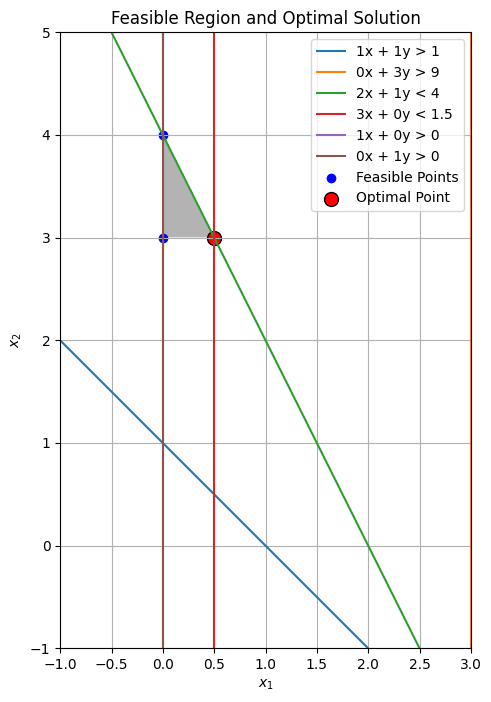

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return x >= 0 and y >= 0  # Ensure non-negative solutions

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-10, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, 1, 1, '>'),    # x1 + x2 >= 1
        (0, 3, 9, '>'),    # 3x2 >= 9
        (2, 1, 4, '<'),    # 2x1 + x2 <= 4
        (3, 0, 1.5, '<'),  # 3x1 <= 1.5
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: x1 - x2  # z = x1 - x2

    x_range = np.linspace(-1, 3, 300)
    y_range = np.linspace(-1, 5, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

        print("\nOptimal Solution:")
        print(f"Optimal Point: ({optimal_point[0]:.2f}, {optimal_point[1]:.2f})")
        print(f"Maximum z = {obj_values[best_idx]:.2f}")

    plt.xlim(-1, 3)
    plt.ylim(-1, 5)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region and Optimal Solution")
    plt.grid(True)
    plt.show()

solve_and_plot()


## **Exercise 2.25: Number of Basic Variables**

**Q: What determines the number of basic variables in a linear programming problem solution?**

**Solution:**

The number of basic variables in a linear programming problem solution is determined by the number of constraints in the system. Specifically, in a system with \( m \) constraints and \( n \) decision variables, a basic feasible solution will have exactly \( m \) basic variables and \( n-m \) non-basic variables.


## **Exercise 2.26: Value of Non-Basic Variable**

**Q: What is the value of a non-basic variable in a feasible solution of a linear programming problem?**

**Solution:**

In a feasible solution of a linear programming problem, a non-basic variable is assigned a value of zero. This allows the remaining basic variables to be solved uniquely from the system of equations.


## **Exercise 2.27: Economic Interpretation of The Objective Function**

**Q: What is the economic interpretation of the objective function row entry corresponding to the i-th slack variable?**

**Solution:**

In an optimal Simplex tableau, the entry in the objective function row corresponding to the i-th slack variable represents the shadow price of the associated constraint. This value indicates how much the objective function will change per unit increase in the right-hand side of that constraint.


## **Exercise 2.28: The Right-Hand-Side Entries In Simplex tableau**

**Q: In a Simplex tableau, what is the interpretation of the entries in the right-hand-side column?**

**Solution:**

The entries in the right-hand-side column of a Simplex tableau represent the values of the basic variables at the current iteration. These values indicate the current feasible solution for the linear programming problem.

## **Exercise 2.29: Consequence Of A Tie For The Entering Basic Variable**

**Q: What is the consequence of a tie for the entering basic variable?**

**Solution:**

If there is a tie for the entering basic variable, any of the tied variables can be chosen as the entering variable. This may lead to different pivot sequences, and in some cases, may affect the number of iterations required to reach the optimal solution.

## **Exercise 2.30: Tie For The Leaving Basic Variable**

**Q: What if there is a tie for the leaving basic variable?**

**Solution:**

If there is a tie for the leaving basic variable, the problem exhibits degeneracy. This can result in cycling, where the Simplex method revisits the same solution repeatedly without progress. Anti-cycling rules, such as Bland’s Rule, can be used to prevent this issue.

## **Exercise 2.31: Objective Function**

**Q: What if, in the objective function row of a final tableau, there is a zero in a column corresponding to a non-basic variable?**

**Solution:**

If there is a zero in the objective function row for a non-basic variable in the final tableau, this indicates the presence of multiple optimal solutions. Any increase in the corresponding variable will not change the optimal objective value, allowing for an alternative optimal solution.

## **Exercise 2.32: Negative Objective Row Coefficient**

**Q: What happens in the Simplex algorithm if you choose, as the entering variable, a variable with a negative objective row coefficient but not the most negative coefficient?**

**Solution:**

If a variable with a negative objective row coefficient is chosen as the entering variable but it is not the most negative, the algorithm may still reach the optimal solution but may take more iterations. The standard approach is to choose the most negative coefficient to ensure the fastest path to optimization.

## **Exercise 2.33: Simplex Method**

This exercise involves solving a linear programming problem using the Simplex method.

### Problem:
- **Objective:** Maximize $$z = x_1 + 9x_2 + x_3$$
- **Constraints:**
$$x_1 + 2x_2 + 3x_3 \leq 9$$
$$3x_1 + 2x_2 + 2x_3 \leq 15$$
$$x_1, x_2, x_3 \geq 0$$


### Code Implementation

In [11]:
from scipy.optimize import linprog

# Coefficients of the objective function (we negate the values for maximization)
c = [-1, -9, -1]  # Maximizing z = x1 + 9x2 + x3

# Coefficients of the constraints
A = [
    [1, 2, 3],  # x1 + 2x2 + 3x3 <= 9
    [3, 2, 2]   # 3x1 + 2x2 + 2x3 <= 15
]

# Right-hand side of the constraints
b = [9, 15]

# Bounds for the variables (x1, x2, x3 >= 0)
x_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

# Use linprog to solve the problem (Simplex method)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x2_bounds, x3_bounds], method='highs')

# Display the results
if result.success:
    x1_opt = result.x[0]
    x2_opt = result.x[1]
    x3_opt = result.x[2]
    max_z = -result.fun  # Negate the result to get the maximized value

    print(f"Optimal value of x1: {x1_opt:.2f}")
    print(f"Optimal value of x2: {x2_opt:.2f}")
    print(f"Optimal value of x3: {x3_opt:.2f}")
    print(f"Maximum value of z: {max_z:.2f}")
else:
    print("Optimization failed.")

Optimal value of x1: 0.00
Optimal value of x2: 4.50
Optimal value of x3: 0.00
Maximum value of z: 40.50


## **Exercise 2.34:  Two Phase Simplex Method**

This exercise involves using the Two-Phase Simplex method to solve a linear programming problem.

### Problem:
- **Objective:** Minimize $$z = 16x_1 + 2x_2 - 3x_3$$
- **Constraints:**
$$x_1 - 6x_2 \geq 4$$
$$3x_2 + 7x_3 \leq -5$$
$$x_1 + x_2 + x_3 = 10$$
$$x_1, x_2, x_3 \geq 0$$

### Code Implementation

In [12]:
from scipy.optimize import linprog
import numpy as np

# Phase 1: Minimize the sum of artificial variables (a1 + a2)
# Coefficients for the artificial variables in the objective function
c_phase1 = np.array([0, 0, 1, 1, 0, 0])  # Minimize a1 + a2

# The augmented matrix for the constraints, including artificial variables
A_phase1 = np.array([
    [1, -6, -1, 0, 0, 1],  # x1 - 6x2 - s1 + a1 = 4
    [0, 3, 0, 1, 0, 1],    # 3x2 + 7x3 + s2 + a2 = -5
    [1, 1, 0, 0, 0, 0]     # x1 + x2 + x3 = 10
])

# Right-hand side (RHS) for Phase 1
b_phase1 = np.array([4, -5, 10])

# Bounds for the variables (all variables must be >= 0)
x_bounds = (0, None)
s_bounds = (0, None)
a_bounds = (0, None)

# Use linprog to solve Phase 1 of the problem
result_phase1 = linprog(c_phase1, A_ub=-A_phase1, b_ub=-b_phase1, bounds=[x_bounds, x_bounds, s_bounds, s_bounds, a_bounds, a_bounds], method='highs')

# Display results of Phase 1
print("Phase 1 Result:")
print("Optimal value of artificial variables:", result_phase1.fun)
print("Optimal values of variables (x1, x2, s1, s2, a1, a2):", result_phase1.x)

# If the sum of artificial variables is zero, proceed to Phase 2
if result_phase1.fun == 0:
    # Phase 2: Now solve the original problem with the reduced objective function (ignoring a1 and a2)
    # Coefficients for the original objective function
    c_phase2 = np.array([16, 2, -3, 0, 0])  # Minimize z = 16x1 + 2x2 - 3x3

    # Constraints matrix for Phase 2 (without artificial variables)
    A_phase2 = np.array([
        [1, -6, 0, 0, 0],   # x1 - 6x2 - s1 = 4
        [0, 3, 7, 0, 0],    # 3x2 + 7x3 + s2 = -5
        [1, 1, 1, 0, 0]     # x1 + x2 + x3 = 10
    ])

    # Right-hand side (RHS) for Phase 2
    b_phase2 = np.array([4, -5, 10])

    # Solve Phase 2
    result_phase2 = linprog(c_phase2, A_ub=A_phase2, b_ub=b_phase2, bounds=[x_bounds, x_bounds, x_bounds, s_bounds, s_bounds], method='highs')

    # Display results of Phase 2
    print("\nPhase 2 Result:")
    print("Optimal value of the objective function:", result_phase2.fun)
    print("Optimal values of variables (x1, x2, x3):", result_phase2.x)
else:
    print("The problem is infeasible because the sum of artificial variables is not zero.")

Phase 1 Result:
Optimal value of artificial variables: 0.0
Optimal values of variables (x1, x2, s1, s2, a1, a2): [10.  0.  0.  0.  0.  0.]

Phase 2 Result:
Optimal value of the objective function: None
Optimal values of variables (x1, x2, x3): None


## **Exercise 2.35: Simplex Method**

### Define Variables
Let:
- \( $x_1$ \) = amount invested in **Plan A**.
- \( $x_2$ \) = amount invested in **Plan B**.


#### Objective Function:

$$\text{Maximize } Z = 2.1x_1 + 2x_2$$


#### Subject to:

$$x_1 + x_2 = 100,000$$

$$x_1 \geq 0$$

$$x_2 \geq 0$$

### Code Implementation

In [13]:
from scipy.optimize import linprog

# Coefficients for the objective function (maximize Z = 2.1x1 + 2x2)
c = [-2.1, -2]  # We multiply by -1 because linprog minimizes the objective function

# Coefficients for the constraints (x1 + x2 = 100000)
A_eq = [[1, 1]]  # x1 + x2 = 100000
b_eq = [100000]

# Bounds for x1 and x2 (both must be >= 0)
x_bounds = (0, None)
x2_bounds = (0, None)

# Use linprog to solve the problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[x_bounds, x2_bounds], method='highs')

# Display the results
if result.success:
    x1_opt = result.x[0]
    x2_opt = result.x[1]
    max_earnings = -result.fun  # We negate the result because we minimized it

    print(f"Optimal amount to invest in Plan A (x1): ${x1_opt:.2f}")
    print(f"Optimal amount to invest in Plan B (x2): ${x2_opt:.2f}")
    print(f"Maximum earnings at the end of 3 years: ${max_earnings:.2f}")
else:
    print("Optimization failed.")

Optimal amount to invest in Plan A (x1): $100000.00
Optimal amount to invest in Plan B (x2): $0.00
Maximum earnings at the end of 3 years: $210000.00


## **Exercise 2.36: Simplex Method**

To formulate this investment portfolio management problem as a linear programming problem, we need to define the decision variables, the objective function, and the constraints based on the given information.

### Decision Variables
Let's denote:
- \( $x_1$ \): the number of units of AAA rated bonds purchased (units of \$5000).
- \( $x_2$ \): the number of units of A rated bonds purchased (units of \$1000).
- \( $x_3$ \): the number of units of J rated (junk) bonds purchased (units of \$10,000).

### Objective Function
We want to maximize the earnings at the end of one year. The earnings from each type of bond can be calculated as follows:
- Earnings from AAA rated bonds: \( 0.06 $\times$ 5000 $\times$ $x_1$ \)
- Earnings from A rated bonds: \( 0.08 $\times$ 1000 $\times$ $x_2$ \)
- Earnings from J rated (junk) bonds: \( 0.10 $\times$ 10,000 $\times$ $x_3$ \)

The total earnings at the end of one year will be the sum of these earnings.

### Constraints
1. The total investment should not exceed \$1,000,000.
$$5000x_1 + 1000x_2 + 10000x_3 \leq 1,000,000$$

2. No more than 25% of the portfolio should be invested in junk bonds.
$$10000x_3 \leq 0.25 \times 1,000,000$$
$$x_3 \leq 25$$

3. At least 40% should be invested in AAA rated bonds.
$$5000x_1 \geq 0.40 \times 1,000,000$$
$$x_1 \geq 80$$

4. Non-negativity constraints:
$$x_1, x_2, x_3 \geq 0$$

### Linear Programming Formulation
The linear programming problem can be formulated as follows:

**Objective:**

Maximize \[$Z$ = (0.06 $\times$ 5000)$x_1$ + (0.08 $\times$ 1000)$x_2$ + (0.10 $\times$ 10000)$x_3$ \]

Simplified to:

Maximize \[$Z$ = 300$x_1$ + 80$x_2$ + 1000$x_3$ \]

**Subject to:**
$$5000x_1 + 1000x_2 + 10000x_3 \leq 1,000,000$$
$$x_3 \leq 25$$
$$x_1 \geq 80$$
$$x_1, x_2, x_3 \geq 0$$

### Code Implementation

In [14]:
from scipy.optimize import linprog

# Coefficients of the objective function (note the negative signs for maximization)
c = [-300, -80, -1000]

# Coefficients of the inequality constraints
A = [
    [5000, 1000, 10000],  # 5000x1 + 1000x2 + 10000x3 <= 1,000,000
    [0, 0, 1],            # x3 <= 25
    [-1, 0, 0]            # -x1 <= -80 (x1 >= 80)
]

# Right-hand side of the inequality constraints
b = [1000000, 25, -80]

# Bounds for each variable
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
bounds = [x1_bounds, x2_bounds, x3_bounds]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print the result
if result.success:
    print(f"Optimal value (Z): {-result.fun}")
    print(f"Optimal solution (x1, x2, x3): {result.x}")
else:
    print("No solution found.")

Optimal value (Z): 77000.0
Optimal solution (x1, x2, x3): [ 80. 350.  25.]


## **Exercise 2.37: Simplex Method**

To formulate this donation problem as a linear programming problem, we need to define the decision variables, the objective function, and the constraints based on the given information.

### Decision Variables
Let's denote:
- \( $x_1$ \): the amount of money (in thousands of dollars) donated to Our Great State University.
- \( $x_2$ \): the amount of money (in thousands of dollars) donated to the Friends of the Grand Opera.
- \( $x_3$ \): the amount of money (in thousands of dollars) donated to the Save the Humuhumunukunukuapua'a Society.

### Objective Function
We want to maximize the number of tax credits. The tax credits for each organization can be calculated as follows:
- Tax credits from Our Great State University: \( 10$x_1$ \)
- Tax credits from the Friends of the Grand Opera: \( 8$x_2$ \)
- Tax credits from the Save the Humuhumunukunukuapua'a Society: \( 6$x_3$ \)

**Objective:**
$$\text{Maximize } Z = 10x_1 + 8x_2 + 6x_3$$

**Subject to:**
$$x_1 + x_2 + x_3 \leq 10,000$$
$$x_1 \leq 5,000$$
$$x_2 \leq 5,000$$
$$x_3 \leq 5,000$$
$$x_1, x_2, x_3 \geq 0$$

### Code Implementation

In [15]:
from scipy.optimize import linprog

# Coefficients of the objective function (note the negative signs for maximization)
c = [-10, -8, -6]

# Coefficients of the inequality constraints
A = [
    [1, 1, 1],      # x1 + x2 + x3 <= 10,000
    [1, 0, 0],      # x1 <= 5,000
    [0, 1, 0],      # x2 <= 5,000
    [0, 0, 1]       # x3 <= 5,000
]

# Right-hand side of the inequality constraints
b = [10000, 5000, 5000, 5000]

# Bounds for each variable
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
bounds = [x1_bounds, x2_bounds, x3_bounds]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print the result
if result.success:
    print(f"Optimal value (Z): {-result.fun}")
    print(f"Optimal solution (x1, x2, x3): {result.x}")
else:
    print("No solution found.")

Optimal value (Z): 90000.0
Optimal solution (x1, x2, x3): [5000. 5000.   -0.]


## **Exercise 2.38: Graphical Method**

**Problem Statement:**
Maximize \( $z$ = $-2x_1$ + $x_2$ \)

**Subject to:**

\begin{align*}
x_1 - x_2 &\leq 5 \\
x_1 &\leq 7 \\
x_2 &\leq 6 \\
x_1 - x_2 &\leq -4 \\
x_1, x_2 &\geq 0
\end{align*}

Solve using Graphical method:

### Code Implementation


Optimal Solution:
Optimal Point: (0.00, 4.00)
Maximum z = 4.00


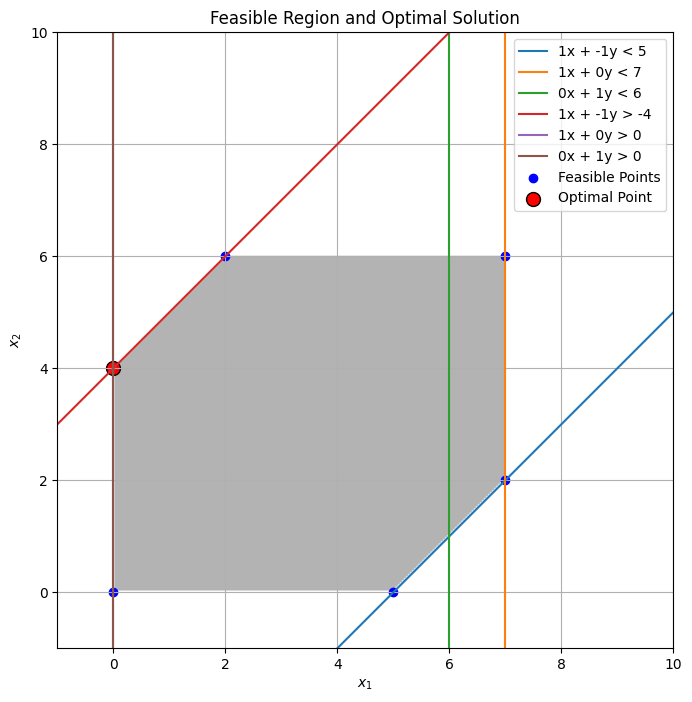

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return x >= 0 and y >= 0  # Ensure non-negative solutions

def find_feasible_points(constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)
    return np.array(feasible_points)

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(-10, 10, 200)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def solve_and_plot():
    constraints = [
        (1, -1, 5, '<'),    # x1 - x2 <= 5
        (1, 0, 7, '<'),   # x1 <= 7
        (0, 1, 6, '<'),   # x2 <= 6
        (1, -1, -4, '>'),   # x1 - x2 >= -4
        (1, 0, 0, '>'),    # x1 >= 0
        (0, 1, 0, '>')     # x2 >= 0
    ]

    obj_func = lambda x1, x2: -2*x1 + x2  # z = -2x1 + x2

    x_range = np.linspace(-1, 10, 300)
    y_range = np.linspace(-1, 10, 300)
    plt.figure(figsize=(8, 8))

    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points = find_feasible_points(constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

        # Compute objective function values at extreme points
        obj_values = [obj_func(x1, x2) for x1, x2 in feasible_points]

        # Display best extreme point
        best_idx = np.argmax(obj_values)
        optimal_point = feasible_points[best_idx]
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

        print("\nOptimal Solution:")
        print(f"Optimal Point: ({optimal_point[0]:.2f}, {optimal_point[1]:.2f})")
        print(f"Maximum z = {obj_values[best_idx]:.2f}")

    plt.xlim(-1, 10)
    plt.ylim(-1, 10)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper right')
    plt.title("Feasible Region and Optimal Solution")
    plt.grid(True)
    plt.show()

solve_and_plot()

## **Exercise 2.39: Dual Problem**

### **Primal Problem (Exercise 2.7)**

Maximize $$z = x_1 - x_2$$


**Subject to:**

$$x_1 + x_2 \geq 1$$

$$3x_2 \leq 9$$

$$2x_1 + x_2 \leq 4$$

$$x_1 \leq \frac{3}{2}$$

$$x_1, x_2 \geq 0$$


---

### **Dual Formulation**
Introduce **dual variables**:

- \( $y_1$ \) for constraint \( $x_1$ + $x_2$ $\geq$ 1 \) (≥ constraint → non-negative)
- \( $y_2$ \) for constraint \( 3$x_2$ $\leq$ 9 \) (≤ constraint → non-negative)
- \( $y_3$ \) for constraint \( 2$x_1$ + $x_2$ $\leq$ 4 \) (≤ constraint → non-negative)
- \( $y_4$ \) for constraint \( $x_1$ $\leq$ $\frac{3}{2}$ \) (≤ constraint → non-negative)

Minimize $$w = 1y_1 + 9y_2 + 4y_3 + \frac{3}{2} y_4$$


**Subject to:**

$$y_1 + 2y_3 + y_4 \geq 1$$

$$y_1 + 3y_2 + y_3 \leq -1$$

$$y_1, y_2, y_3, y_4 \geq 0$$


### Code Implementation

In [17]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (Minimize w)
c = [1, 9, 4, 3/2]  # Corresponds to y1, y2, y3, y4

# Coefficients for inequality constraints (Ax >= b → convert to -Ax ≤ -b)
A = [
    [-1, 0, -2, -1],  # - (y1 + 2y3 + y4) ≤ -1
    [-1, -3, -1, 0]   # - (y1 + 3y2 + y3) ≥ 1 → (y1 + 3y2 + y3 ≤ -1)
]
b = [-1, 1]  # Right-hand side values

# Bounds for y variables (all must be ≥ 0)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve the LP
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Display results
print("Status:", res.message)
print("Optimal Value of w:", res.fun)
print("Optimal Values for y:", res.x)

Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Optimal Value of w: 1.0
Optimal Values for y: [1. 0. 0. 0.]


## **Exercise 2.40: Dual Problem**

### **Dual of Exercise 2.8**
#### **Primal Problem:**

Maximize $$z = -2x_1 + x_2$$


**Subject to:**

$$x_1 - x_2 \leq 5$$

$$x_1 \leq 7$$

$$x_2 \leq 6$$

$$x_1 - x_2 \geq -4$$

$$x_1, x_2 \geq 0$$

#### **Dual Formulation:**
Introduce dual variables \( $y_1$, $y_2$, $y_3$, $y_4$ \) corresponding to the four constraints.

Minimize $$w = 5y_1 + 7y_2 + 6y_3 - 4y_4$$


**Subject to:**

$$y_1 + y_2 + y_4 \geq -2$$

$$- y_1 + y_3 - y_4 \geq 1$$

$$y_1, y_2, y_3, y_4 \geq 0$$

### Code Implementation

In [18]:
# Coefficients of the objective function (Minimize w)
c = [5, 7, 6, -4]

# Constraints
A = [
    [-1, -1, 0, -1],  # - (y1 + y2 + y4) ≤ -2
    [1, 0, -1, 1]     # - (-y1 + y3 - y4) ≤ 1 → (y1 - y3 + y4 ≥ -1)
]
b = [-2, 1]  # Right-hand side values

# Bounds
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve the LP
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Display results
print("Status:", res.message)
print("Optimal Value of w:", res.fun)
print("Optimal Values for y:", res.x)

Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Optimal Value of w: -2.0
Optimal Values for y: [0. 0. 1. 2.]


## **Exercise 2.41: Dual Problem**

### **Dual of Exercise 2.12**
#### **Primal Problem:**

Maximize $$z = 16x_1 + 2x_2 - 3x_3$$

**Subject to:**

$$x_1 - 6x_2 \geq 4$$

$$3x_2 + 7x_3 \leq -5$$

$$x_1 + x_2 + x_3 = 10$$

$$x_1, x_2, x_3 \geq 0$$

#### **Dual Formulation:**
Introduce dual variables \( $y_1$, $y_2$, $y_3$ \) corresponding to the three constraints.

Minimize $$w = 4y_1 - 5y_2 + 10y_3$$


**Subject to:**

$$y_1 + y_3 \geq 16$$

$$-6y_1 + 3y_2 + y_3 \geq 2$$

$$7y_2 + y_3 \geq -3$$

$$y_1, y_2, y_3 \geq 0$$

### Code Implementation

In [19]:
# Coefficients of the objective function (Minimize w)
c = [4, -5, 10]

# Constraints
A = [
    [-1, 0, -1],  # - (y1 + y3) ≤ -16
    [6, -3, -1],  # - (-6y1 + 3y2 + y3) ≤ -2
    [0, -7, -1]   # - (7y2 + y3) ≤ 3
]
b = [-16, -2, 3]  # Right-hand side values

# Bounds
bounds = [(0, None), (0, None), (0, None)]

# Solve the LP
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Display results
print("Status:", res.message)
print("Optimal Value of w:", res.fun)
print("Optimal Values for y:", res.x)


Status: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)
Optimal Value of w: None
Optimal Values for y: None


## **Exercise 2.42: Dual Problem**

### **Dual of Exercise 2.10**
#### **Primal Problem:**

Maximize $$z = 3x_1 + 4x_2$$

**Subject to:**

$$6x_1 + 8x_2 \leq 10$$

$$x_1 + x_2 \geq 1$$

$$x_1 \geq 1, \quad x_2 \geq 0$$

#### **Dual Formulation:**
Introduce dual variables \( $y_1$, $y_2$, $y_3$ \).

Minimize $$w = 10y_1 + y_2 + y_3$$


**Subject to:**

$$6y_1 + y_2 - y_3 \geq 3$$

$$8y_1 + y_2 \geq 4$$

$$y_1, y_2, y_3 \geq 0$$

### Code Implementation

In [20]:
# Coefficients of the objective function (Minimize w)
c = [10, 1, 1]

# Constraints
A = [
    [-6, -1, 1],  # - (6y1 + y2 - y3) ≤ -3
    [-8, -1, 0]   # - (8y1 + y2) ≤ -4
]
b = [-3, -4]  # Right-hand side values

# Bounds
bounds = [(0, None), (0, None), (0, None)]

# Solve the LP
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Display results
print("Status:", res.message)
print("Optimal Value of w:", res.fun)
print("Optimal Values for y:", res.x)

Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Optimal Value of w: 4.0
Optimal Values for y: [0. 4. 0.]


## **Exercise 2.43: Fill in The Blanks**

### **Simplex Algorithm Statements Completion**

Each statement describes a concept related to the **Simplex algorithm**, and we need to choose the correct completion from the given options.

---

#### **Given Statements and Choices**
1. If all slack and surplus variables are zero in an optimal solution, then **_______**.
2. If a basic variable has the value zero in an optimal solution, then **_______**.
3. If an artificial variable is non-zero in an optimal solution, then **_______**.
4. If a non-basic variable has zero coefficient in the top row of an optimal tableau, then **_______**.

**Completion Alternatives:**
A. There are multiple optimal solutions.  
B. The current solution is degenerate.  
C. All constraints are equalities at optimality.  
D. The shadow prices are inverses of the dual variables.  
E. No feasible solution exists.  
F. The solution is unbounded.  

---

### **Final Answers:**
| Statement | Answer |
|-----------|--------|
| **1.** All slack and surplus variables are zero → | **C** (All constraints are equalities at optimality) |
| **2.** A basic variable has the value zero → | **B** (Degenerate solution) |
| **3.** An artificial variable is non-zero → | **E** (No feasible solution) |
| **4.** A non-basic variable has zero coefficient in the top row → | **A** (Multiple optimal solutions) |

## **Exercise 2.44: Fill in The Blanks**

### **Primal-Dual Relationships Completion**

Each statement describes a relationship between the **primal** and **dual** linear programming problems. We need to complete them using the provided choices.

---

#### **Given Statements and Choices**
1. The optimal objective function value in the primal problem corresponds to **__________**.  
2. The shadow prices in the optimal primal tableau correspond to **__________**.  
3. Basic variables in the optimal primal tableau correspond to **__________**.  
4. The variables in the primal problem correspond to **__________**.  
5. Shadow prices in the optimal dual tableau correspond to **________**.  

**Completion Alternatives:**
A. The primal non-basic variables  
B. The dual non-basic variables  
C. The primal constraints  
D. Optimal basic variables in the dual problem  
E. The optimal objective function value in the dual  
F. The shadow prices in the dual  
G. Basic variables in the optimal primal problem  
H. The constraints in the dual problem  

---

### **Final Answers:**
| Statement | Answer |
|-----------|--------|
| **1.** Optimal objective function value in primal → | **E** (Optimal objective function value in the dual) |
| **2.** Shadow prices in the optimal primal tableau → | **F** (Shadow prices in the dual) |
| **3.** Basic variables in the optimal primal tableau → | **G** (Basic variables in the optimal primal problem) |
| **4.** Variables in the primal problem → | **H** (Constraints in the dual problem) |
| **5.** Shadow prices in the optimal dual tableau → | **D** (Optimal basic variables in the dual problem) |


## **Exercise 2.45: Changes In Objective Function Coefficient $c_2$**

To determine the range within which changes in the objective function coefficient \($c_2$\) (associated with \($x_2$\)) can vary without affecting the optimal solution, we need to perform sensitivity analysis. Specifically, we are looking for the range of \($c_2$\) that maintains the same optimal solution.

### Step 1: Solve the LP problem without changing the objective coefficient \($c_2$\)

The original objective function is:

$$\text{max} (z = 4x_1 + 3x_2)$$

Subject to:

$$x_1 + x_2 \leq 4$$

$$2x_1 + x_2 \leq 6$$

$$x_1 + 3x_2 \leq 9$$

$$x_1, x_2 \geq 0$$


First, we solve this linear programming problem. The feasible region is bounded by the constraints, and we find the optimal solution by graphical method or using the simplex method.

### Step 2: Graphical solution (or simplex)

By solving the system, we find the following optimal solution for the original coefficients:


$$x_1 = 2, \quad x_2 = 2, \quad \text{and} \quad z = 4(2) + 3(2) = 8 + 6 = 14$$


### Step 3: Sensitivity analysis

Now, we analyze how the coefficient \($c_2$\) (the coefficient of \($x_2$\) in the objective function) can change without altering the optimal solution.

- **Identify the binding constraints at the optimal solution**: From the previous solution, we can check which constraints are binding at the optimal solution \($x_1$ = 2\) and \($x_2$ = 2\).
  
  - Constraint 1: \($x_1$ + $x_2$ = 4\) is binding at \(($x_1$, $x_2$) = (2, 2)\)
  - Constraint 2: \(2$x_1$ + $x_2$ = 6\) is also binding at \(($x_1$, $x_2$) = (2, 2)\)
  - Constraint 3: \($x_1$ + 3$x_2$ = 9\) is not binding, as \($x_1$ + 3$x_2$ = 2 + 6 = 8\), which is less than 9.

- **Check the range for \($c_2$\)**: The key is to see how the objective coefficient \($c_2$\) affects the relative importance of the decision variables \($x_1$\) and \($x_2$\). The optimal solution will remain unchanged as long as \($x_2$ = 2\) continues to be part of the solution.

Given that the first two constraints are binding, the range for \($c_2$\) can be computed by determining the values at which the solution would switch from one set of active constraints to another.

### Code Implementation

In [21]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function
c1 = 4  # Coefficient of x1
c2 = 3  # Coefficient of x2, which we will vary

# Define the coefficients of the constraints
A = np.array([
    [1, 1],   # x1 + x2 <= 4
    [2, 1],   # 2x1 + x2 <= 6
    [1, 3]    # x1 + 3x2 <= 9
])

b = np.array([4, 6, 9])  # Right-hand side of the constraints

# Bounds for x1 and x2 (both must be >= 0)
x0_bounds = (0, None)
x1_bounds = (0, None)

# Function to solve the LP problem with varying c2
def solve_lp(c2_value):
    c = np.array([c1, c2_value])  # Update the objective function with new c2 value

    # Solve the LP problem
    res = linprog(-c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

    if res.success:
        return res.x[0], res.x[1], -res.fun  # Return the optimal x1, x2, and objective function value (negate back)
    else:
        return None  # If the optimization failed

# Solve for the original c2 = 3
x1_opt, x2_opt, z_opt = solve_lp(c2)

# Print the original optimal solution
print(f"Original Optimal Solution (c2 = {c2}):")
print(f"x1 = {x1_opt}, x2 = {x2_opt}, Optimal Z = {z_opt}\n")

# Now, vary c2 and check when the solution remains the same
def check_c2_range(min_c2, max_c2, step=0.1):
    results = []
    for c2_value in np.arange(min_c2, max_c2, step):
        solution = solve_lp(c2_value)
        if solution and np.isclose(solution[0], x1_opt) and np.isclose(solution[1], x2_opt):
            results.append((c2_value, solution[2]))
    return results

# Check the range for c2
min_c2 = 2
max_c2 = 5
results = check_c2_range(min_c2, max_c2, step=0.1)

# Display the results
print(f"Range of c2 that does not change the optimal solution:")
for res in results:
    print(f"c2 = {res[0]:.1f}, Optimal Z = {res[1]:.2f}")


Original Optimal Solution (c2 = 3):
x1 = 1.9999999999999982, x2 = 2.000000000000002, Optimal Z = 14.0

Range of c2 that does not change the optimal solution:
c2 = 2.1, Optimal Z = 12.20
c2 = 2.2, Optimal Z = 12.40
c2 = 2.3, Optimal Z = 12.60
c2 = 2.4, Optimal Z = 12.80
c2 = 2.5, Optimal Z = 13.00
c2 = 2.6, Optimal Z = 13.20
c2 = 2.7, Optimal Z = 13.40
c2 = 2.8, Optimal Z = 13.60
c2 = 2.9, Optimal Z = 13.80
c2 = 3.0, Optimal Z = 14.00
c2 = 3.1, Optimal Z = 14.20
c2 = 3.2, Optimal Z = 14.40
c2 = 3.3, Optimal Z = 14.60
c2 = 3.4, Optimal Z = 14.80
c2 = 3.5, Optimal Z = 15.00
c2 = 3.6, Optimal Z = 15.20
c2 = 3.7, Optimal Z = 15.40
c2 = 3.8, Optimal Z = 15.60
c2 = 3.9, Optimal Z = 15.80


## **Exercise 2.46: Khachiyan’s Algorithm**

### **Significance of Khachiyan’s Algorithm for Linear Programming**

Leonid Khachiyan introduced the **Ellipsoid Algorithm** in 1979, which was the **first polynomial-time algorithm for linear programming**.  

#### **Theoretical Significance**:
- **Proved that linear programming can be solved in polynomial time**  
  - Before Khachiyan’s algorithm, the **Simplex Method** was widely used but had **exponential worst-case complexity**.
  - Khachiyan’s **Ellipsoid Algorithm** demonstrated that **LP problems belong to the P complexity class** (solvable in polynomial time).
  
- **Based on Convex Optimization**  
  - Uses **iterative refinement** of an enclosing ellipsoid that shrinks toward the optimal solution.
  
- **Breakthrough in Computational Complexity**  
  - Established a link between **linear programming** and **convex optimization**.
  - Laid the groundwork for **interior-point methods** (which later became more practical).

#### **Limitations**:
- Although polynomial in theory, it is **not efficient in practice** compared to the Simplex Method.
- **High computational overhead** makes it slower for real-world problems.

## **Exercise 2.47: Khachiyan’s Algorithm**

### **Significance of Interior-Point Methods (Karmarkar’s Algorithm)**
In 1984, Narendra Karmarkar introduced an **Interior-Point Method (IPM)** for solving LP problems, which outperformed the Simplex Method in practice.

#### **Practical Significance**:
- **Faster than Simplex for large-scale problems**  
  - Karmarkar’s algorithm runs in **polynomial time** and is **efficient in practice**.
  - Works well on **high-dimensional** LP problems (e.g., **millions of variables**).

- **Moves through the interior of the feasible region**  
  - Unlike Simplex (which moves along edges), IPMs move **inside the feasible space**, reducing iteration steps.

- **Foundation for modern LP solvers**  
  - IPMs are widely used in **commercial solvers** like **CPLEX, Gurobi, and MOSEK**.
  - Became the **preferred method** for large-scale industrial applications.

#### **Comparison with Simplex**:
| **Aspect**          | **Simplex Method**         | **Interior-Point Method**      |
|---------------------|--------------------------|--------------------------------|
| **Worst-case complexity** | Exponential (but fast in practice) | Polynomial (theoretically better) |
| **Path to optimality** | Moves along edges of the feasible region | Moves through the interior |
| **Performance on large LPs** | Slower for high-dimensional problems | Efficient for large-scale problems |
| **Practical use** | Still widely used for small/medium LPs | Preferred for large-scale optimization |

# **Conclusion**

Through these exercises, we explored key concepts in linear programming and optimization, applying the Simplex method, sensitivity analysis, and dual formulations. The solutions provide insights into real-world decision-making scenarios, reinforcing the importance of mathematical modeling in operations research. By utilizing computational tools, we efficiently solved complex optimization problems, demonstrating the power and applicability of linear programming in various fields.